<h1><center>Exploratory Data Analysis using Python</center></h1>


# Univariate Analysis

### Import libraries

In [1]:
import os
os.getcwd()

'/Users/davidfortini/Lovelace_Bootcamp_2'

In [2]:
import matplotlib.pyplot as plt
# import libraries
import pandas as pd
import numpy as np
automobile = pd.read_pickle('./car_data.pkl')

### Vehicle make frequency diagram

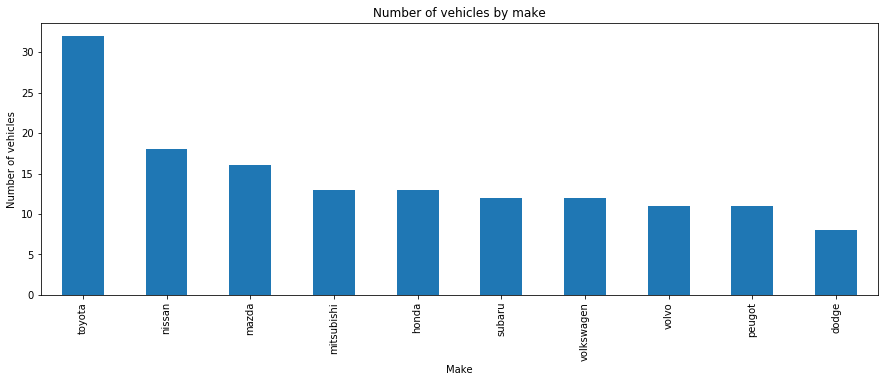

In [3]:
automobile.make.value_counts().nlargest(10).plot(kind='bar', figsize=(15,5))
plt.title("Number of vehicles by make")
plt.ylabel('Number of vehicles')
plt.xlabel('Make');

### Insurance risk ratings Histogram

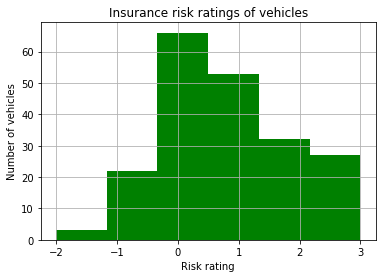

In [4]:
automobile.symboling.hist(bins=6,color='green');
plt.title("Insurance risk ratings of vehicles")
plt.ylabel('Number of vehicles')
plt.xlabel('Risk rating');

### Normalized losses histogram

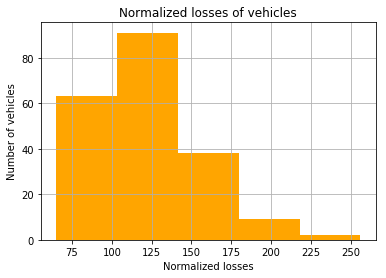

In [29]:
automobile['normalized-losses'].hist(bins=5,color='orange');
plt.title("Normalized losses of vehicles")
plt.ylabel('Number of vehicles')
plt.xlabel('Normalized losses');

### Fuel type bar chart

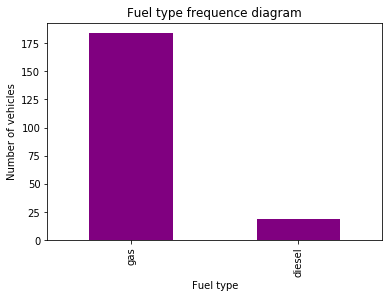

In [30]:
automobile['fuel-type'].value_counts().plot(kind='bar',color='purple')
plt.title("Fuel type frequence diagram")
plt.ylabel('Number of vehicles')
plt.xlabel('Fuel type');

### Fuel type pie diagram

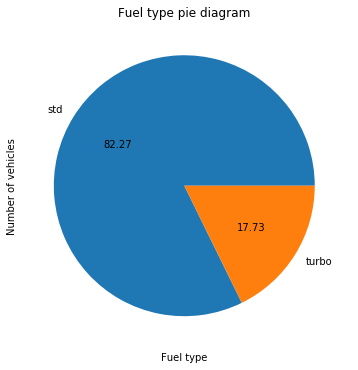

In [31]:
automobile['aspiration'].value_counts().plot.pie(figsize=(6, 6), autopct='%.2f')
plt.title("Fuel type pie diagram")
plt.ylabel('Number of vehicles')
plt.xlabel('Fuel type');

### Horse power histogram

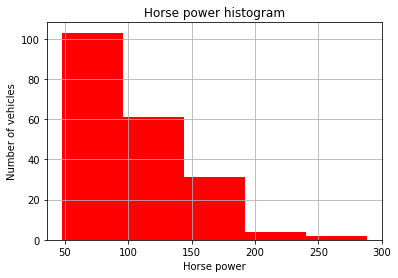

In [32]:
automobile.horsepower[np.abs(automobile.horsepower-automobile.horsepower.mean())<=(3*automobile.horsepower.std())].hist(bins=5,color='red');
plt.title("Horse power histogram")
plt.ylabel('Number of vehicles')
plt.xlabel('Horse power');

### Curb weight histogram

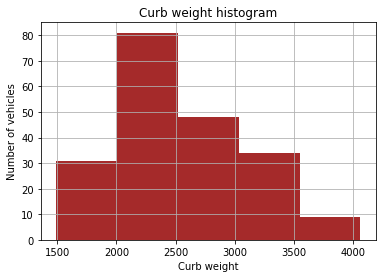

In [33]:
automobile['curb-weight'].hist(bins=5,color='brown');
plt.title("Curb weight histogram")
plt.ylabel('Number of vehicles')
plt.xlabel('Curb weight');

### Drive wheels bar chart

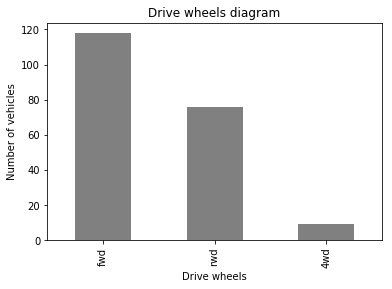

In [34]:
automobile['drive-wheels'].value_counts().plot(kind='bar',color='grey')
plt.title("Drive wheels diagram")
plt.ylabel('Number of vehicles')
plt.xlabel('Drive wheels');

### Number of doors bar chart

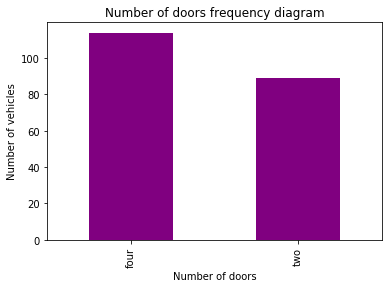

In [35]:
automobile['num-of-doors'].value_counts().plot(kind='bar',color='purple')
plt.title("Number of doors frequency diagram")
plt.ylabel('Number of vehicles')
plt.xlabel('Number of doors');

### Findings
We have taken some key features of the automobile dataset for this analysis and below are our findings.
1. Toyota is the make of the car which has most number of vehicles with more than 40% than the 2nd highest Nissan
2. Most preferred fuel type for the customer is standard vs trubo having more than 80% of the choice
3. For drive wheels, front wheel drive has most number of cars followed by rear wheel and four wheel. There are very less number of cars for four wheel drive.
4. Curb weight of the cars are distributed between 1500 and 4000 approximately
5. Symboling or the insurance risk rating have the ratings between -3 and 3 however for our dataset it starts from -2. There are more cars in the range of 0 and 1.
6. Normalized losses which is the average loss payment per insured vehicle year is has more number of cars in the range between 65 and 150.

## Correlation Analysis

Findings: There are some good inferences we can take it from the correlation heat map.
1. Price is more correlated with engine size and curb weight of the car 
2. Curb weight is mostly correlated with engine size, length, width and wheel based which is expected as these adds up the weight of the car
3. Wheel base is highly correlated with length and width of the car
4. Symboling and normalized car are correlated than the other fields

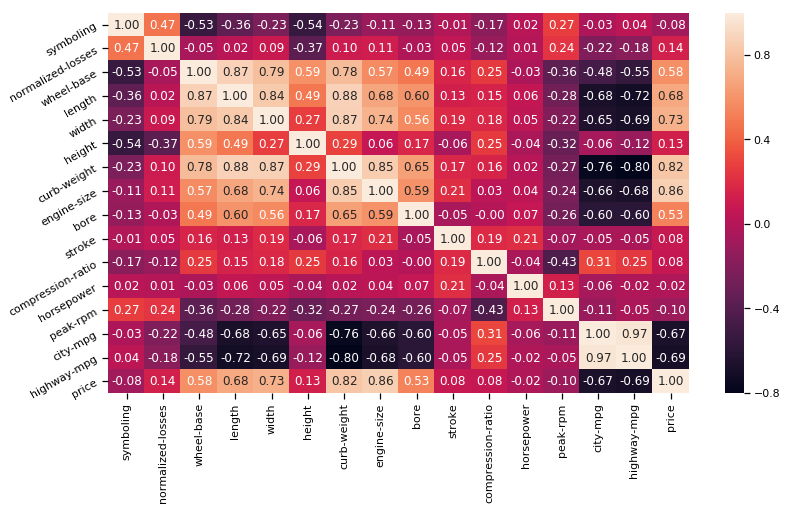

In [36]:
import seaborn as sns
corr = automobile.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(13,7))
a = sns.heatmap(corr, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

## Bivariate Analysis

### Boxplot of Price and make
    Findings: Below are our findings on the make and price of the car
		○ The most expensive car is manufacture by Mercedes benz and the least expensive is Chevrolet
		○ The premium cars costing more than 20000 are BMW, Jaquar, Mercedes benz and Porsche
		○ Less expensive cars costing less than 10000 are Chevrolet, Dodge, Honda, Mitsubishi, Plymoth and Subaru
		○ Rest of the cars are in the midrange between 10000 and 20000 which has the highest number of cars

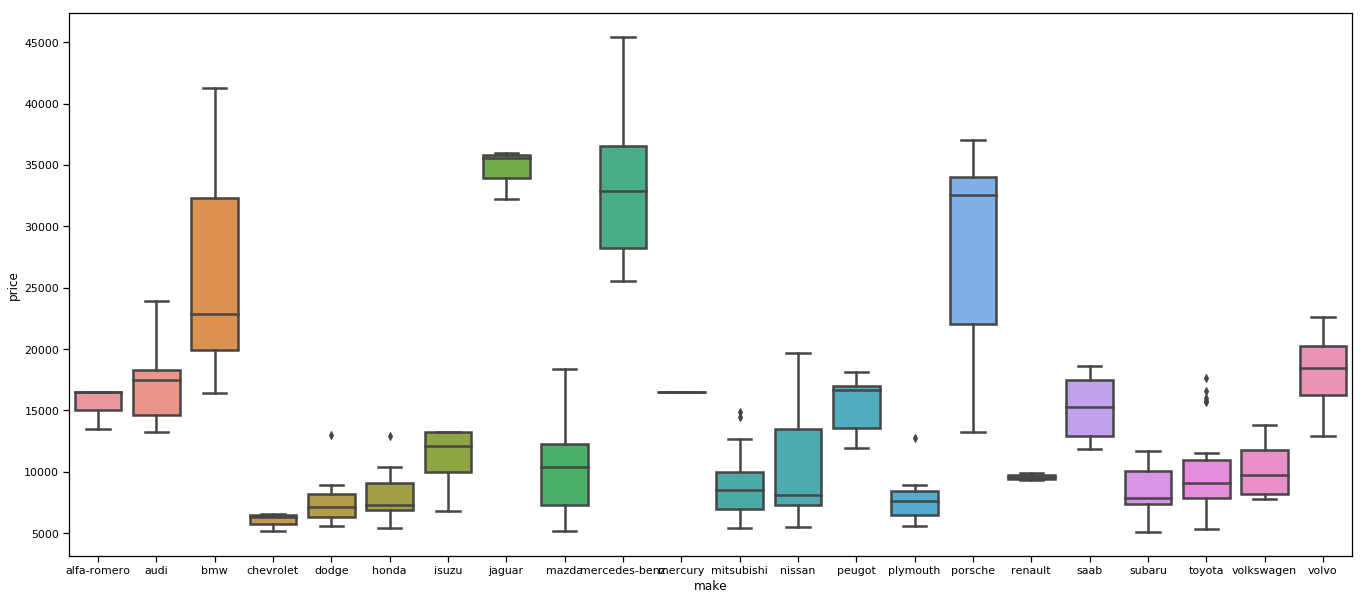

In [37]:
plt.rcParams['figure.figsize']=(23,10)
ax = sns.boxplot(x="make", y="price", data=automobile)

### Scatter plot of price and engine size

Findings: The more the engine size the costlier the price is

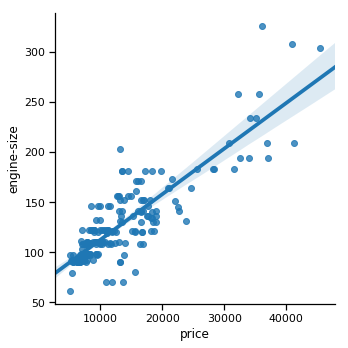

In [38]:
g = sns.lmplot('price',"engine-size", automobile);

### Scatter plot of normalized losses and symboling
Findings: From the scattered plot, it's very evident that the lesser the rating lesser the normalized loss. It looks like the negative ratings are better for the car which has lesser losses.

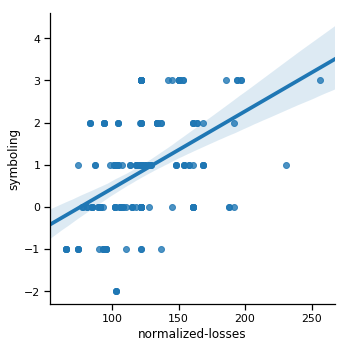

In [39]:
g = sns.lmplot('normalized-losses',"symboling", automobile);

### Scatter plot of Engine size and Peak RPM

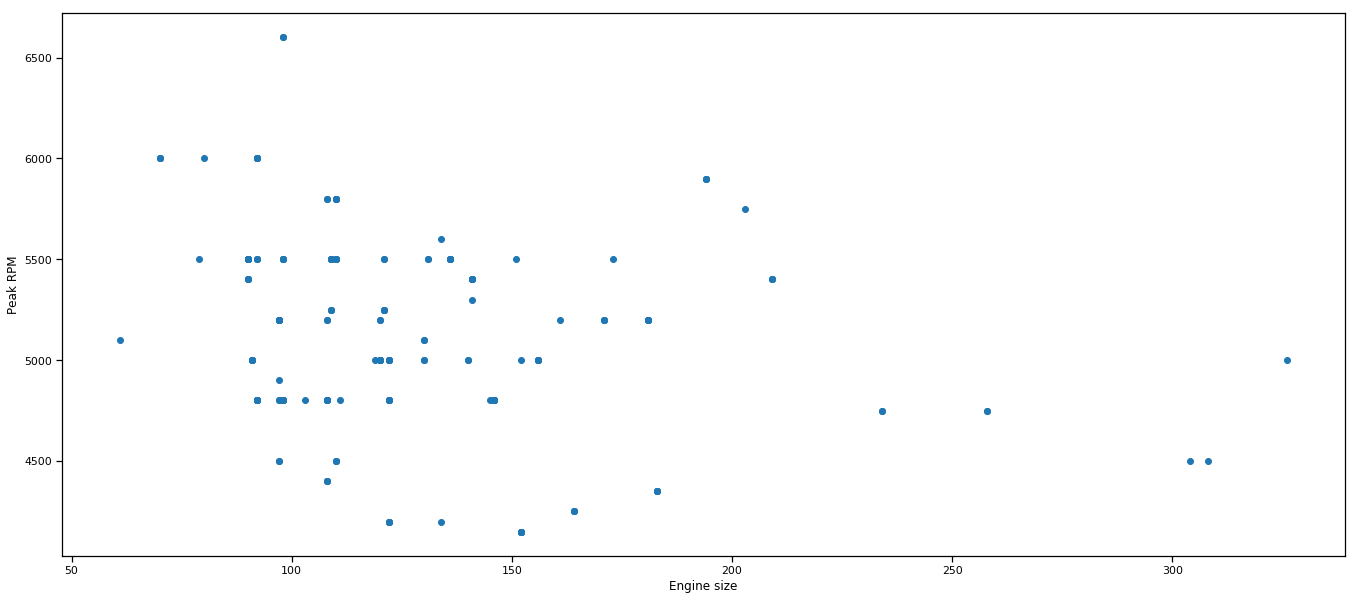

In [40]:
plt.scatter(automobile['engine-size'],automobile['peak-rpm'])
plt.xlabel('Engine size')
plt.ylabel('Peak RPM');

### Scatter plot of City and Highway MPG, Curb weight based on Make of the car

Based on the scatter plot and the provided data set, it is clear that for both city and highway mileage of the automobile is inversely proportional to the curb weight. 

Heavier the Automobile less is the mileage for both City and Highway

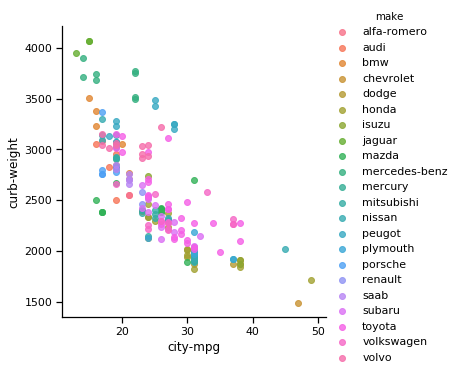

In [41]:
g = sns.lmplot('city-mpg',"curb-weight", automobile, hue="make", fit_reg=False);

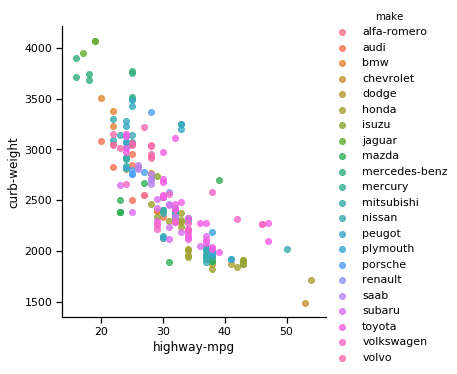

In [42]:
g = sns.lmplot('highway-mpg',"curb-weight", automobile, hue="make",fit_reg=False);

### Drive wheels and City MPG bar chart

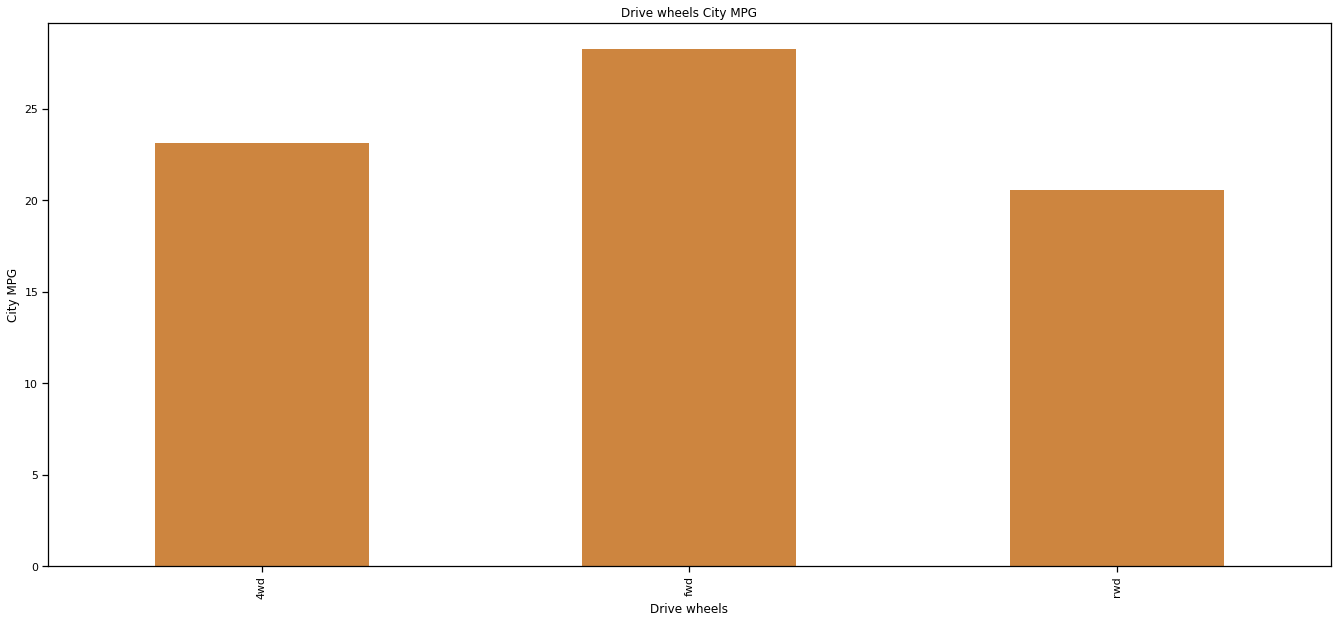

In [43]:
automobile.groupby('drive-wheels')['city-mpg'].mean().plot(kind='bar', color = 'peru');
plt.title("Drive wheels City MPG")
plt.ylabel('City MPG')
plt.xlabel('Drive wheels');

### Drive wheels and Highway MPG bar chart

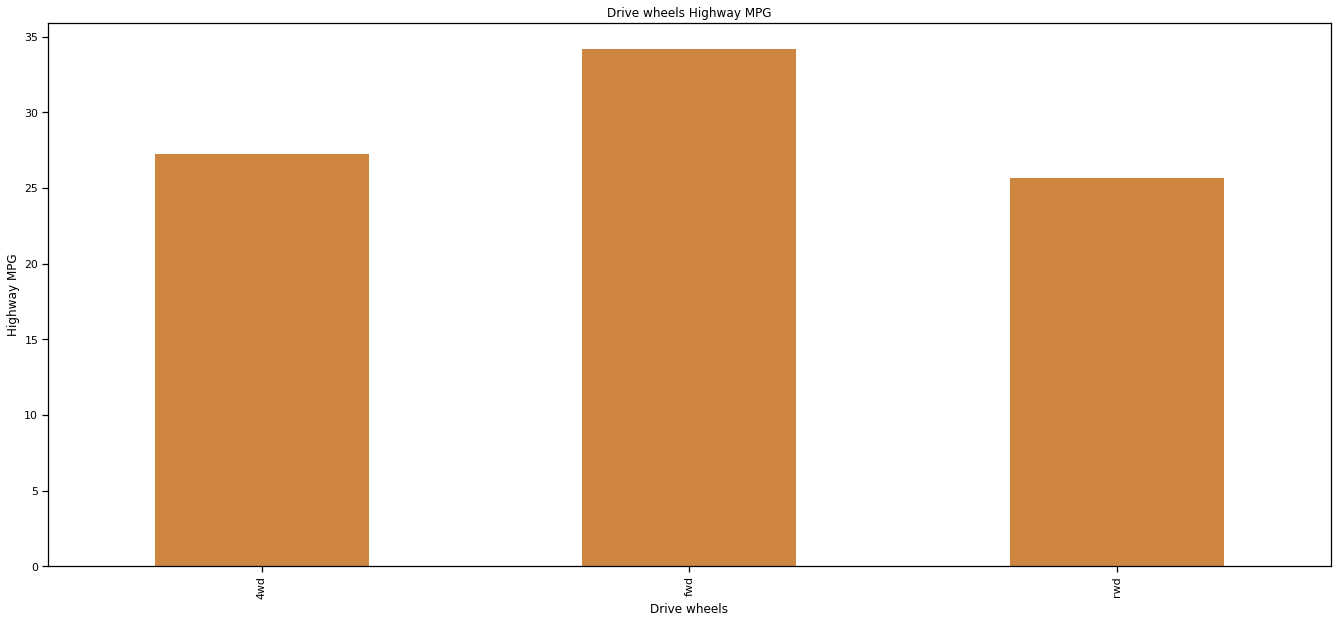

In [44]:
automobile.groupby('drive-wheels')['highway-mpg'].mean().plot(kind='bar', color = 'peru');
plt.title("Drive wheels Highway MPG")
plt.ylabel('Highway MPG')
plt.xlabel('Drive wheels');

## Boxplot of Drive wheels and Price

Findings: It's very evident that the Real wheel drive cars are most expensive and front wheel is least expensive cars. Four wheel drive cars are little higher than the front wheel drive cars. There is very less number of four wheel drive cars in our dataset so this picture might not be very accurate.

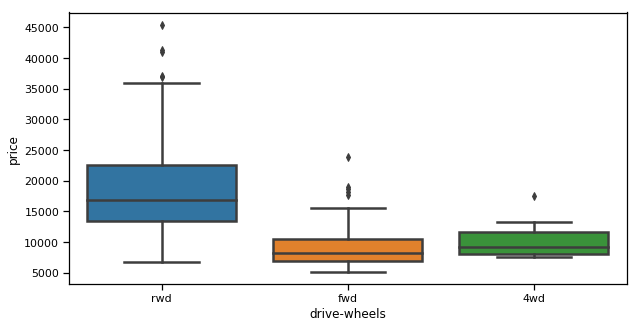

In [45]:
plt.rcParams['figure.figsize']=(10,5)
ax = sns.boxplot(x="drive-wheels", y="price", data=automobile)

### Normalized losses based on body style and no. of doors

Findings: As we understand the normalized loss which is the average loss payment per insured vehicle is calculated with many features of the cars which includes body style and no. of doors. Normalized losses are distributed across different body style but the two door cars has more number of losses than the four door cars.

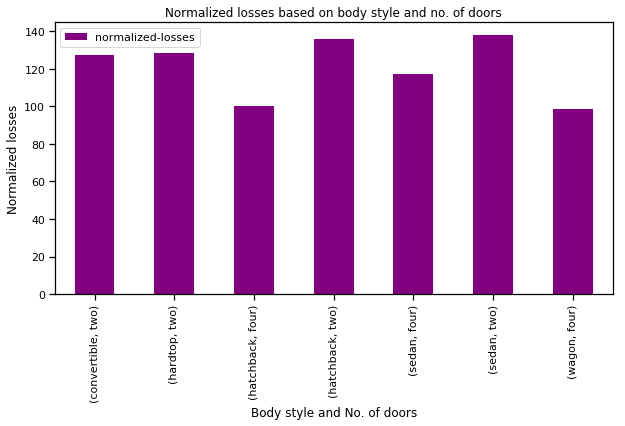

In [46]:
pd.pivot_table(automobile,index=['body-style','num-of-doors'], values='normalized-losses').plot(kind='bar',color='purple')
plt.title("Normalized losses based on body style and no. of doors")
plt.ylabel('Normalized losses')
plt.xlabel('Body style and No. of doors');

## Conclusion

Analysis of the data set provides 

- How the data set are distributed
- Correlation between different fields and how they are related
- Normalized loss of the manufacturer 
- Symboling : Cars are initially assigned a risk factor symbol associated with its price
- Mileage : Mileage based on City and Highway driving for various make and attributes
- Price : Factors affecting Price of the Automobile.
- Importance of drive wheels and curb weight